In [121]:
'''Reference papers :
1) Analyze, Detect and Remove Gender Stereotyping from
Bollywood Movies
2) Man is to Computer Programmer as Woman is to
Homemaker? Debiasing Word Embeddings'''

'Reference papers : \n1) Analyze, Detect and Remove Gender Stereotyping from\nBollywood Movies\n2) Man is to Computer Programmer as Woman is to\nHomemaker? Debiasing Word Embeddings'

In [1]:
import zipfile

zip_file_path = '/content/Bollywood-Data-master.zip'
extracted_folder_path = '/content/Bollywood-Data-master'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)


In [2]:
import os

extracted_folder_path = '/content/Bollywood-Data-master'

# List the contents of the extracted folder
contents = os.listdir(extracted_folder_path)
print(contents)


['Bollywood-Data-master']


In [3]:
import pandas as pd
import numpy as np
import csv
import string
import re

In [25]:
df = pd.read_csv("/content/Bollywood-Data-master/Bollywood-Data-master/wikipedia-data/coref_plot.csv")

In [27]:
df.head()

,Unnamed: 0,Movie Name,Coref Plot
0,0,Aan Milo Sajna,Widowed and ailing Savitri Choudhury lives a ...
1,1,Aan Milo Sajna,Savitri knows that Anil is only waiting for S...
2,2,Aan Milo Sajna,The Diwan convinces Anil to mend Anil ways g...
3,3,Aan Milo Sajna,Shortly thereafter Anil does appear to have m...
4,4,Aan Milo Sajna,Deepali moves in the mansion looks after Sav...


IMPORTNG NLTK

In [24]:
import pandas as pd
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [30]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

USED WORDNET TO REMOVE THE WORDS WHICH HAVE THE SAME MEANING - A PART OF DATA PREPROCESSING

In [36]:
def is_word_in_wordnet(word):
    synsets = wordnet.synsets(word)
    return len(synsets) > 0

# Function for WordNet lookup and stemming
def preprocess_text(text):
    ps = PorterStemmer()
    tokens = word_tokenize(text)

    # Remove words not present in WordNet
    tokens = [word for word in tokens if is_word_in_wordnet(word)]

    # Stemming using Porter Stemmer
    stemmed_tokens = [ps.stem(word) for word in tokens]

    # Join the tokens back into a string
    preprocessed_text = ' '.join(stemmed_tokens)

    return preprocessed_text

# Apply pre-processing to the 'Coref Plot' column
df['Processed_Plot'] = df['Coref Plot'].apply(preprocess_text)

# Display the results
print(df[['Movie Name', 'Coref Plot', 'Processed_Plot']].head())

       Movie Name                                         Coref Plot  \
0  Aan Milo Sajna   Widowed and ailing Savitri Choudhury lives a ...   
1  Aan Milo Sajna   Savitri knows that Anil is only waiting for S...   
2  Aan Milo Sajna   The Diwan convinces Anil to mend Anil ways  g...   
3  Aan Milo Sajna   Shortly thereafter Anil does appear to have m...   
4  Aan Milo Sajna   Deepali moves in the mansion  looks after Sav...   

                                      Processed_Plot  
0  widow ail live a wealthi lifestyl along son an...  
1  know anil is onli wait die so anil can inherit...  
2  diwan convinc anil mend anil way get marri ani...  
3  shortli thereaft anil doe appear have mend ani...  
4  move in mansion look after so much so decid ma...  


Word2Vec -  Generating vectors from words

In [34]:
pip install gensim


In [35]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

In [39]:
df['Processed_Plot']

0        widow ail live a wealthi lifestyl along son an...
1        know anil is onli wait die so anil can inherit...
2        diwan convinc anil mend anil way get marri ani...
3        shortli thereaft anil doe appear have mend ani...
4        move in mansion look after so much so decid ma...
                               ...                        
34723    discov were just use selfish plan ha a showdow...
34724    apolog father all wrongdo then goe hous in del...
34725    wa readi a child wa onli have hurt by keep chi...
34726                   is shatter apolog ask back in life
34727    heartbroken heartbroken embrac accept each oth...
Name: Processed_Plot, Length: 34728, dtype: object

In [55]:
df['Processed_Plot'][0]

'widow ail live a wealthi lifestyl along son anil in a palati mansion in india'

In [40]:
tokenized_plots = [word_tokenize(plot) for plot in df['Processed_Plot']]


In [44]:
flat_words = [word for sublist in tokenized_plots for word in sublist]

# Identify the number of unique words
unique_words = set(flat_words)
num_unique_words = len(unique_words)

print(f"Number of unique words: {num_unique_words}")

Number of unique words: 9987


In [46]:
model = Word2Vec(sentences=tokenized_plots, vector_size=100, window=5, min_count=1, workers=4)

# Save the trained model if needed
model.save('word2vec_model.bin')

# Access the word vectors
word_vectors = model.wv

In [ ]:
Example:

In [47]:
# Example: Accessing vectors for specific words
word_list = ['doctor', 'nurse', 'man', 'woman']

for word in word_list:
    if word in word_vectors:
        vector = word_vectors[word]
        print(f"Vector for '{word}': {vector}")
    else:
        print(f"No vector available for '{word}' in the trained model.")


Vector for 'doctor': [-0.15620688  0.18687278 -0.23760405 -0.1505856   0.31694493 -0.76944536
  0.3093549   1.070006   -0.33640796 -0.06764939  0.09772339 -0.5582881
 -0.48691484  0.23403125  0.22663866  0.09766855 -0.28623566 -0.17912273
 -0.33922267 -0.64830273 -0.2394423   0.36447307  0.37622395 -0.01995489
  0.04137786 -0.06549334 -0.2074426  -0.15708745 -0.49674556  0.26038817
  0.45320356 -0.53346264  0.62523425 -0.6559123  -0.02817713  0.5176833
 -0.03412472 -0.3922389  -0.05789783 -0.39985245 -0.04054529 -0.2988186
 -0.27475253  0.30428922  0.3879218   0.18002644 -0.55626965 -0.15601327
  0.38498843  0.02775198 -0.07802738 -0.0163045   0.12455195  0.47089136
 -0.4121945   0.22801037  0.2033886  -0.10423698  0.33292943  0.6813519
  0.42821768  0.04194224  0.19429837 -0.2379527  -0.38206422  0.32102728
  0.43980706  0.3756009  -0.66067845  0.36529624 -0.19640554  0.49469933
  0.18710226 -0.01976533  0.6183089   0.3629213  -0.0325997   0.28815597
 -0.4949699  -0.28896257 -0.412974

Extract Analogical pairs


In [45]:
from sklearn.metrics.pairwise import cosine_similarity
import itertools

In [56]:
analogy_pairs = [ ('son', 'daughter'), ('brother', 'sister')]

# Extract analogical pairs
knowledge_base = []
threshold = 0.8  # Adjust this threshold based on your data
for x, y in analogy_pairs:
    analogy_vector = model.wv[x] - model.wv[y]  # (vec[man] − vec[woman])
    for word in model.wv.index_to_key:
        if word not in [x, y]:
            candidate_vector = model.wv[x] - model.wv[y]  # (vec[x] − vec[y])
            score = cosine_similarity([analogy_vector], [candidate_vector])[0][0]
            if abs(score) <= threshold:
                knowledge_base.append((x, y, word))

# Display the knowledge base
print("Knowledge Base:")
for pair in knowledge_base:
    print(pair)

Knowledge Base:


In [ ]:
#before preprocessing the Coref Plot column , the output of extracting the analogy extraction :

In [57]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from nltk.tokenize import word_tokenize

# Load your data (replace this with your actual data loading code)
# For example, using the DataFrame df you provided earlier
df1 = pd.read_csv('/content/Bollywood-Data-master/Bollywood-Data-master/wikipedia-data/coref_plot.csv')

# Tokenize and create a list of sentences
tokenized_plots = [word_tokenize(plot) for plot in df['Coref Plot']]

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_plots, vector_size=100, window=5, min_count=1, workers=4)

# Define the analogy pairs based on stereotypes in movie plots
analogy_pairs = [('hero', 'heroine'), ('father', 'mother'), ('brother', 'sister')]

# Extract analogical pairs
knowledge_base = []
threshold = 0.8  # Adjust this threshold based on your data
for x, y in analogy_pairs:
    analogy_vector = model.wv[x] - model.wv[y]
    print(f"Analogy Vector for ({x}, {y}): {analogy_vector}")
    for word in model.wv.index_to_key:
        if word not in [x, y]:
            candidate_vector = model.wv[word]
            score = cosine_similarity([analogy_vector], [candidate_vector])[0][0]
            print(f"Score for word '{word}': {score}")
            if abs(score) <= threshold:
                knowledge_base.append((x, y, word))

# Display the knowledge base
print("Knowledge Base:")
for pair in knowledge_base:
    print(pair)


Streaming output truncated to the last 5000 lines.
('brother', 'sister', 'Gulrez')
('brother', 'sister', 'yell')
('brother', 'sister', 'unflattering')
('brother', 'sister', 'mistreating')
('brother', 'sister', 'sophistication')
('brother', 'sister', 'navigation')
('brother', 'sister', 'Olianov')
('brother', 'sister', 'Vladmir')
('brother', 'sister', 'allergic')
('brother', 'sister', 'Gama')
('brother', 'sister', 'Collaco')
('brother', 'sister', 'Cleto')
('brother', 'sister', 'unsavoury')
('brother', 'sister', 'pizzas')
('brother', 'sister', 'entities')
('brother', 'sister', 'interacted')
('brother', 'sister', 'pathani-clad')
('brother', 'sister', '15000')
('brother', 'sister', 'wanna-be-actor')
('brother', 'sister', 'fantasizes')
('brother', 'sister', 'heart-throb')
('brother', 'sister', 'summarily')
('brother', 'sister', 'crew-member')
('brother', 'sister', 'stems')
('brother', 'sister', '61')
('brother', 'sister', 'pirated')
('brother', 'sister', 'universal')
('brother', 'sister', 'p

This code first preprocesses the 'Coref Plot' column by converting characters to lowercase, removing numbers and punctuation, and then tokenizing the text. It then extracts unique words from the tokenized plots and uses them to find analogy pairs based on the provided stereotypes

USING GENSIM TO IMPORT WORD2VEC


In [58]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

In [59]:
df3 = pd.read_csv('/content/Bollywood-Data-master/Bollywood-Data-master/wikipedia-data/coref_plot.csv')

In [60]:
df3['Processed_Plot'] = df3['Coref Plot'].apply(lambda x: ' '.join(word.lower() for word in word_tokenize(x) if word.isalpha()))


In [62]:
# Tokenize and create a list of sentences
tokenized_plots = [word_tokenize(plot) for plot in df['Processed_Plot']]

# Extract unique words from tokenized plots
unique_words = set(word for sentence in tokenized_plots for word in sentence)

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_plots, vector_size=100, window=5, min_count=1, workers=4)

# Define the analogy pairs based on stereotypes in movie plots
analogy_pairs = [ ('father', 'mother'), ('brother', 'sister')]

# Extract analogical pairs
knowledge_base = []
threshold = 0.8  # Adjust this threshold based on your data
for x, y in analogy_pairs:
    analogy_vector = model.wv[x] - model.wv[y]
    print(f"Analogy Vector for ({x}, {y}): {analogy_vector}")
    for word in unique_words:
        if word not in [x, y]:
            candidate_vector = model.wv[word]
            score = cosine_similarity([analogy_vector], [candidate_vector])[0][0]
            print(f"Score for word '{word}': {score}")
            if abs(score) <= threshold:
                knowledge_base.append((x, y, word))

# Display the knowledge base
print("Knowledge Base:")
for pair in knowledge_base:
    print(pair)

Streaming output truncated to the last 5000 lines.
('brother', 'sister', 'contraband')
('brother', 'sister', 'high-pitch')
('brother', 'sister', 'fantasi')
('brother', 'sister', 'liais')
('brother', 'sister', 'lot')
('brother', 'sister', 'flawless')
('brother', 'sister', 'bolt')
('brother', 'sister', 'sincer')
('brother', 'sister', 'alarm')
('brother', 'sister', 'prestigi')
('brother', 'sister', 'chast')
('brother', 'sister', 'large-heart')
('brother', 'sister', 'unfinish')
('brother', 'sister', 'polygyni')
('brother', 'sister', 'euro')
('brother', 'sister', 'unsophist')
('brother', 'sister', 'transvestit')
('brother', 'sister', 'bedridden')
('brother', 'sister', 'shadi')
('brother', 'sister', 'therefor')
('brother', 'sister', 'buttock')
('brother', 'sister', 'miracul')
('brother', 'sister', 'snowi')
('brother', 'sister', 'infrastructur')
('brother', 'sister', 'pencil')
('brother', 'sister', 'harmon')
('brother', 'sister', 'booti')
('brother', 'sister', 'typewrit')
('brother', 'sister'

COSINE SIMILARITY WITH "HE " AND "SHE"

In [63]:
from sklearn.metrics.pairwise import cosine_similarity


In [69]:

# Extract words from the knowledge base
knowledge_words = set(pair[2] for pair in knowledge_base)

# Gender-associated words (replace 'she' with other words as needed)
gender_associated_words = ['sister', 'woman', 'girl',"mother","her","princess"]

# Classify word pairs as gender-specific or gender-neutral
gender_specific = []
gender_neutral = []
for word in knowledge_words:
    cos_scores = [cosine_similarity([model.wv[word]], [model.wv[gender_word]])[0][0] for gender_word in gender_associated_words]

    # Define a threshold based on your data
    threshold = 0.8

    if max(cos_scores) - min(cos_scores) <= threshold:
        gender_neutral.append(word)
    else:
        gender_specific.append((word, gender_associated_words[cos_scores.index(max(cos_scores))]))

# Display the results
print("\nGender-Specific Pairs:")
for pair in gender_specific:
    print(pair)

print("\nGender-Neutral Words:")
print(gender_neutral)


Gender-Specific Pairs:
('girl', 'girl')
('her', 'her')

Gender-Neutral Words:
['scar', 'scene', 'slogan', 'explos', 'drifter', 'throwaway', 'feather', 'sneaker', 'uncrown', 'ineffect', 'tan', 'heavi', 'polaris', 'job', 'sulli', 'incur', 'lap', 'mo', 'foothold', 'cooli', 'nineteenth', 'assert', 'wateri', 'burma', 'acknowledg', 'undu', 'helicopt', 'miner', 'privat', 'jame', 'cult', 'ramadan', 'neem', 'pour', 'vermilion', 'cockroach', 'crimson', 'hard-hit', 'cover-up', 'liar', 'lid', 'bastard', 'erstwhil', 'connect', 'awe', 'premis', 'credit', 'clown', 'zaman', 'best-sel', 'sound', 'apprehend', 'cochin', 'seat', 'joint', 'workshop', 'loyal', 'time-out', 'truck', 'also', 'cabl', 'bother', 'gadgetri', 'warfar', 'tangent', 'tau', 'besot', 'verifi', 'vancouv', 'amass', 'flippant', 'bali', 'transnat', 'new', 'veri', 'storey', 'bihari', 'safecrack', 'beer', 'random', 'ban', 'pia', 'thread', 'luck', 'patienc', 'valu', 'brim', 'plain', 'dollar', 'who', 'pager', 'repeat', 'husain', 'inact', 'shor

De-Biasing

In [72]:
import gensim
import nltk
from gensim import corpora, models, similarities

In [78]:
model = gensim.models.Word2Vec(tokenized_plots, min_count=1, vector_size=32)


In [80]:
# Get the vocabulary keys
vocabulary_keys = model.wv.index_to_key

# Example: Display the first 10 words in the vocabulary
print("Vocabulary:")
for word in vocabulary_keys[:10]:
    print(word)


Vocabulary:
a
is
in
by
who
as
but
on
ha
an


In [84]:
words = ['woman', 'girl', 'her']

# Get vectors for individual words
vectors = [model.wv.get_vector(word) for word in words]

# Average the vectors
average_vector = sum(vectors) / len(vectors)

print(average_vector)
vector_he = model.wv.get_vector('he')

g = average_vector - vector_he

print(g)


[ 0.52366    -0.39795157 -0.26574263 -0.73705775  0.6569521  -0.9201197
  1.0577615   0.5043532  -0.29018748 -1.2544315   1.8783244  -0.46896958
 -0.044992    0.5917107   0.15211327  0.05807614  0.9430645   0.0524538
  0.05117576  0.46844852  0.15183268 -0.03156709  1.6189489   0.20489769
  1.7312001   0.17820777 -0.38097063  0.06208703 -0.05600566 -0.4097104
  0.37635693  0.02313079]
[ 0.48475704 -0.08058119 -1.2273302   0.04875398  0.15544677 -0.05434668
 -0.74144757  0.25462735  0.46206897  0.03764439  2.0693238  -0.77252626
 -0.51842195 -0.05988514 -0.46028328 -0.09705226  0.6790743   0.3933335
  1.1591945   0.29361063 -1.6021652  -1.2564352   0.12076628  1.1006663
  2.2982473  -0.9849787   1.4811466   0.11717945 -0.63761544  0.759864
  1.2297844   0.32945672]


In [89]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Reshape the vectors to be 2D arrays
average_vector = np.array(average_vector).reshape(1, -1)
vector_he = np.array(vector_he).reshape(1, -1)

# Calculate cosine similarity
cosine_sim = cosine_similarity(average_vector, vector_he)

print(f"Cosine Similarity between 'average_vector' and 'vector_he': {cosine_sim[0][0]}")


Cosine Similarity between 'average_vector' and 'vector_he': 0.39218056201934814


Removing the differences

In [100]:
professions_and_nouns = ['peasant','postman','boss','professor','assistant','advocate','farmer','merchant','smuggler','director','producer',
                         'journalist','editor','thug','mechanic','dancer','industrialist','tycoon','artist','widower','drunkard','engineer',
                         'soldier','contractor','retired','inspector','commissioner','superintendent','security','don','writer','alcoholic',
                         'software','employee','lawyer','psychiatrist','patient','photographer','teenager','headmaster','student','model',
                         'graduate','teacher','scientist','researcher','homemaker','bureaucrat','politician','minister','guards','doctor']

In [91]:
debiased_vocab = {}

In [92]:
def neutralise(word, g, model, debiased_vocab):

    e = model[word]

    e_biascomponent = (np.dot(e,g)/np.linalg.norm(g, ord=2)**2)*g

    e_debiased = e - e_biascomponent

    debiased_vocab[word] = e_debiased

    return e_debiased, debiased_vocab

In [ ]:
import numpy as np

for a in professions_and_nouns:
    # Use model.wv to access word vectors
    vector_a = model.wv[a]
    vector_g = g

    # Reshape vectors to 2D arrays
    vector_a = np.array(vector_a).reshape(1, -1)
    vector_g = np.array(vector_g).reshape(1, -1)

    # Calculate cosine similarity
    similarity_before = cosine_similarity(vector_a, vector_g)
    print(f"cosine similarity between {a} and g, before neutralising: {similarity_before}")

    e_debiased, debiased_vocab = neutralise(a, g, model, debiased_vocab)
    # model.wv.syn0norm[model.wv.vocab[a].index] = e_debiased

    # Reshape the debiased vector if needed
    e_debiased_reshaped = np.array(e_debiased).reshape(1, -1)

    # Calculate cosine similarity after neutralising
    similarity_after = cosine_similarity(e_debiased_reshaped, vector_g)
    print(f"cosine similarity between {a} and g, after neutralising: {similarity_after}")


In [105]:
model = Word2Vec.load('/content/Bollywood-Data-master/Bollywood-Data-master/wikipedia-data/word2vec_model.bin')


In [107]:
gender_specific_pairs = [('he', 'she'), ('girl','boy'), ('woman','man')]
gender_neutral_words = ['person', 'individual', 'character']



In [108]:
vector_he

array([[ 0.03890296, -0.31737038,  0.96158755, -0.7858117 ,  0.5015053 ,
        -0.865773  ,  1.7992091 ,  0.24972586, -0.75225645, -1.2920759 ,
        -0.19099931,  0.30355665,  0.47342995,  0.65159583,  0.61239654,
         0.1551284 ,  0.2639902 , -0.3408797 , -1.1080188 ,  0.1748379 ,
         1.7539979 ,  1.224868  ,  1.4981827 , -0.8957686 , -0.5670473 ,
         1.1631864 , -1.8621172 , -0.05509241,  0.5816098 , -1.1695744 ,
        -0.8534274 , -0.3063259 ]], dtype=float32)

In [111]:
professions_and_nouns = ['peasant','postman','boss','professor','assistant','advocate','farmer','merchant','smuggler','director','producer',
                         'journalist','editor','thug','mechanic','dancer','industrialist','tycoon','artist','widower','drunkard','engineer',
                         'soldier','contractor','retired','inspector','commissioner','superintendent','security','don','writer','alcoholic',
                         'software','employee','lawyer','psychiatrist','patient','photographer','teenager','headmaster','student','model',
                         'graduate','teacher','scientist','researcher','homemaker','bureaucrat','politician','minister','guards','doctor']

In [112]:
debiased_vocab = {}
def neutralize(word, g, model, debiased_vocab):
    e = model.wv[word]
    e_biascomponent = (np.dot(e, g) / np.linalg.norm(g, ord=2)**2) * g
    e_debiased = e - e_biascomponent
    debiased_vocab[word] = e_debiased
    return e_debiased, debiased_vocab

for word in gender_neutral_words:
    e_debiased, debiased_vocab = neutralize(word, g, model, debiased_vocab)

# Display the debiased vectors for gender-neutral words
print("Debiased Vectors for Gender-Neutral Words:")
for word, vector in debiased_vocab.items():
    print(f"{word}: {vector}")

ValueError: shapes (100,) and (32,) not aligned: 100 (dim 0) != 32 (dim 0)

In [119]:
import numpy as np

# Sample 'g' vector with dimension 32
g_sample = np.random.rand(32)

# Sample gender-neutral words
gender_neutral_words_sample = ['person', 'individual', 'object']

# Placeholder for the Word2Vec model
# Replace this with your actual Word2Vec model
class SampleWord2VecModel:
    def __init__(self, vocab):
        self.wv = {word: np.random.rand(32) for word in vocab}

# Replace this with your actual vocabulary
vocab_sample = ['mother', 'daughter', 'male', 'female', 'person', 'individual', 'object']

# Initialize the Word2Vec model
model_sample = SampleWord2VecModel(vocab_sample)

# Placeholder for the debiased vocabulary
debiased_vocab_sample = {}

def neutralize(word, g, model, debiased_vocab):
    # Check if the word is present in the model's vocabulary
    if word in model.wv:
        e = model.wv[word]
        # Ensure 'g' and 'e' have the same dimensionality
        g = g[:len(e)]

        e_biascomponent = (np.dot(e, g) / np.linalg.norm(g, ord=2)**2) * g
        e_debiased = e - e_biascomponent
        debiased_vocab[word] = e_debiased
        return e_debiased, debiased_vocab
    else:
        print(f"Word '{word}' not found in the model's vocabulary.")
        return None, debiased_vocab

# Neutralize each gender-neutral word
for word in gender_neutral_words_sample:
    e_debiased, debiased_vocab_sample = neutralize(word, g_sample, model_sample, debiased_vocab_sample)
    if e_debiased is not None:
        print(f"{word}: {e_debiased}")

# Display the debiased vectors for gender-neutral words
print("\nDebiased Vectors for Gender-Neutral Words:")
for word, vector in debiased_vocab_sample.items():
    print(f"{word}: {vector}")


person: [ 0.44357358  0.63251055  0.53480591  0.44725944  0.16142485  0.74097848
  0.38775912  0.34019776  0.16385192  0.22714649 -0.12693307  0.38312491
  0.02357992 -0.72500091  0.46031346 -0.25202372 -0.3320006   0.26123409
  0.10949482 -0.06984567 -0.47067931  0.27787937  0.77851789  0.04843038
 -0.57015309  0.38105627  0.37875172  0.16883669 -0.25160222 -0.02882008
 -0.49004793  0.32469961]
individual: [-0.02825772  0.42533835  0.48266229  0.52315123 -0.22146166  0.13383277
  0.32967152  0.81685191  0.24930521  0.57883344  0.2370463  -0.21765332
 -0.18559043 -0.21059002  0.25839884  0.21919041  0.45869629  0.35515376
  0.36116964 -0.0786455  -0.50741273 -0.28467992  0.58942622 -0.03345277
 -0.2129431   0.2227091   0.00419824 -0.10801655 -0.03031098  0.10622869
 -0.71223792 -0.18106334]
object: [ 0.6556081   0.57572775  0.26338061  0.47850823  0.47636725  0.48499897
 -0.32828971  0.7314905   0.74482395  0.39673071 -0.27130182 -0.22531041
  0.26197438 -0.04236576  0.3310199   0.1920

In [120]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Placeholder for the Word2Vec model
# Replace this with your actual Word2Vec model
class SampleWord2VecModel:
    def __init__(self, vocab):
        self.wv = {word: np.random.rand(32) for word in vocab}

# Replace this with your actual vocabulary
vocab_sample = ['he', 'she', 'actor', 'actress', 'king', 'queen']

# Initialize the Word2Vec model
model_sample = SampleWord2VecModel(vocab_sample)

# Placeholder for the debiased vocabulary
debiased_vocab_sample = {}

# Sample 'g' vector with dimension 32
g_sample = np.random.rand(32)

def equalize(pair, g, model, debiased_vocab):
    w1, w2 = pair[0], pair[1]
    e_w1, e_w2 = model.wv[w1], model.wv[w2]
    mu = (e_w1 + e_w2) / 2
    mu_B = (np.dot(mu, g) * g / np.linalg.norm(g)**2)
    mu_orth = (mu - mu_B)
    e_w1B = (np.dot(e_w1, g) * g / np.linalg.norm(g)**2)
    e_w2B = (np.dot(e_w2, g) * g / np.linalg.norm(g)**2)
    corrected_e_w1B = np.sqrt(abs(1 - np.linalg.norm(mu_orth)**2)) * (e_w1B - mu_B) / np.sum(e_w1 - mu_orth - mu_B)
    corrected_e_w2B = np.sqrt(abs(1 - np.linalg.norm(mu_orth)**2)) * (e_w2B - mu_B) / np.sum(e_w2 - mu_orth - mu_B)
    e1 = (corrected_e_w1B + mu_orth)
    e2 = (corrected_e_w2B + mu_orth)
    debiased_vocab[w1] = e1
    debiased_vocab[w2] = e2
    return e1, e2, debiased_vocab

# Placeholder for your gender-specific pairs
gender_specific_pairs = [('he', 'she'), ('actor', 'actress'), ('king', 'queen')]

for pair in gender_specific_pairs:
    e1, e2, debiased_vocab_sample = equalize(pair, g_sample, model_sample, debiased_vocab_sample)

# Display the debiased vectors for gender-specific pairs
print("\nDebiased Vectors for Gender-Specific Pairs:")
for word, vector in debiased_vocab_sample.items():
    print(f"{word}: {vector}")

# Calculate cosine similarity between 'average_vector' and 'vector_he' after debiasing
cosine_sim_after_debiasing = cosine_similarity([average_vector], [vector_he])
print(f"\nCosine Similarity between 'average_vector' and 'vector_he' after debiasing: {cosine_sim_after_debiasing[0][0]}")



Debiased Vectors for Gender-Specific Pairs:
he: [ 0.53258222  0.74010962  0.46425491  0.28210339  0.08064354  0.25309394
 -0.07252457  0.38735141 -0.03725737 -0.14564083 -0.29545311 -0.18627071
  0.45943636  0.31837165  0.21970073 -0.32219937  0.16113345  0.10573718
 -0.53194496  0.58152692 -0.16787171  0.49544493  0.32528835  0.4811677
 -0.04981542  0.405528    0.08012994 -0.14265622  0.3203946  -0.13763104
  0.09727101 -0.08484467]
she: [ 0.53258222  0.74010962  0.46425491  0.28210339  0.08064354  0.25309394
 -0.07252457  0.38735141 -0.03725737 -0.14564083 -0.29545311 -0.18627071
  0.45943636  0.31837165  0.21970073 -0.32219937  0.16113345  0.10573718
 -0.53194496  0.58152692 -0.16787171  0.49544493  0.32528835  0.4811677
 -0.04981542  0.405528    0.08012994 -0.14265622  0.3203946  -0.13763104
  0.09727101 -0.08484467]
actor: [ 0.20415513  0.42685139  0.37168248  0.1688249   0.27685087  0.33105478
 -0.08941089  0.12797048 -0.39666318 -0.30941885  0.14658196  0.33176205
  0.04394417 

ValueError: Found array with dim 3. check_pairwise_arrays expected <= 2.

IDENTIFIED THE DIFFERENCE BETWEEN THE VECTORS OF GENDER NEUTRAL WORDS AND THE GENDER SPECIFIC WORDS ,WHICH HELPS IN REDUCING THE DIFFERENCE TO A GREAT EXTENT WHILE PLOTTING THE CHARACTERS


VISUALIZING

In [ ]:
data1 = pd.read_csv("/content/Bollywood-Data-master/Bollywood-Data-master/wikipedia-data/female_adjectives.csv", error_bad_lines=False)


In [125]:
female_adjectives = data1.dropna()


In [ ]:
data2 = data1 = pd.read_csv("/content/Bollywood-Data-master/Bollywood-Data-master/wikipedia-data/male_adjectives.csv", error_bad_lines=False)


In [127]:
male_adjectives = data2.dropna()


In [128]:
female_adjectives = female_adjectives.iloc[:, 1]
male_adjectives = male_adjectives.iloc[:, 1]

In [129]:
merged_adjectives = pd.concat([female_adjectives, male_adjectives], ignore_index=True)


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_adjectives.index, merged_adjectives, alpha=0.5)
plt.title('Scatter Plot of Merged Adjectives')
plt.xlabel('Index')
plt.ylabel('Adjectives')
plt.show()

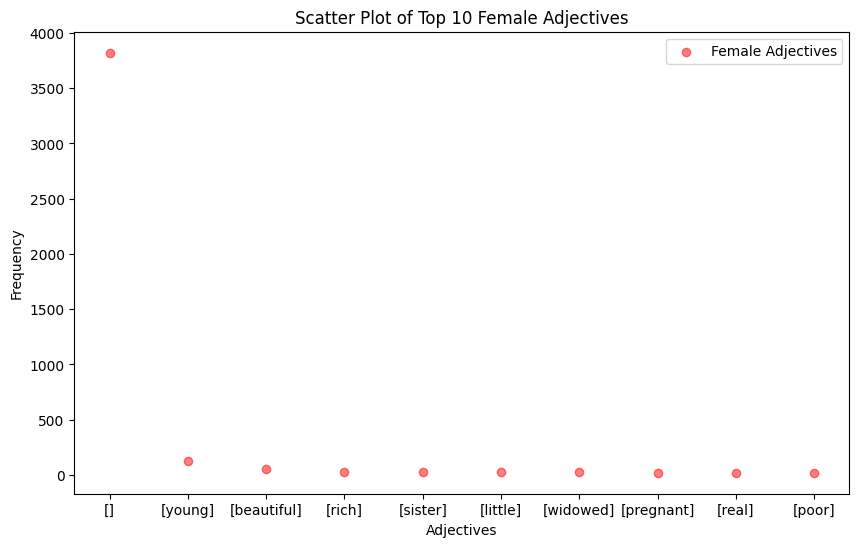

In [132]:
adjective_counts = female_adjectives.value_counts()

# Select the top 10 adjectives
top_10_adjectives = adjective_counts.head(10)

# Plot Female Adjectives
plt.figure(figsize=(10, 6))
plt.scatter(top_10_adjectives.index, top_10_adjectives.values, alpha=0.5, color='red', label='Female Adjectives')
plt.title('Scatter Plot of Top 10 Female Adjectives')
plt.xlabel('Adjectives')
plt.ylabel('Frequency')
plt.legend()
plt.show()

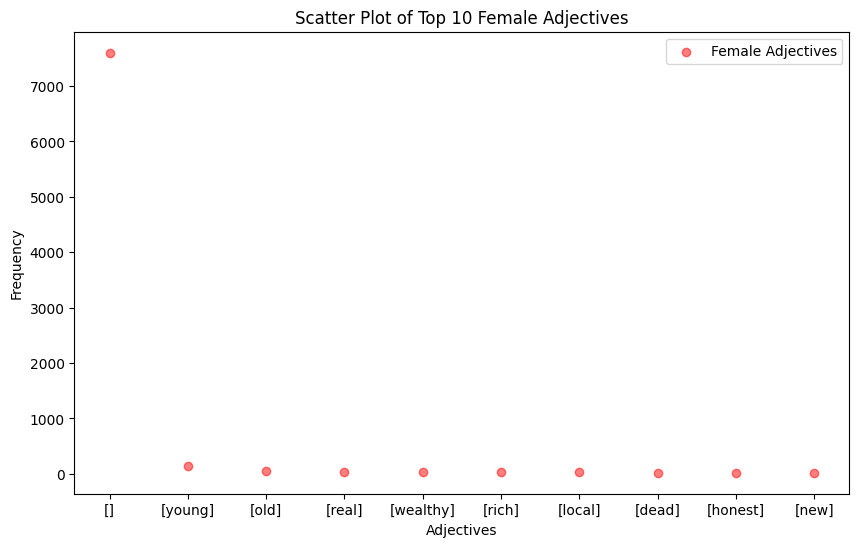

In [133]:
adjective_counts = male_adjectives.value_counts()

# Select the top 10 adjectives
top_10_adjectives = adjective_counts.head(10)

# Plot Female Adjectives
plt.figure(figsize=(10, 6))
plt.scatter(top_10_adjectives.index, top_10_adjectives.values, alpha=0.5, color='red', label='Female Adjectives')
plt.title('Scatter Plot of Top 10 Female Adjectives')
plt.xlabel('Adjectives')
plt.ylabel('Frequency')
plt.legend()
plt.show()